In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 3s 1us/step


In [22]:
X_train_full.shape

(60000, 28, 28)

In [26]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

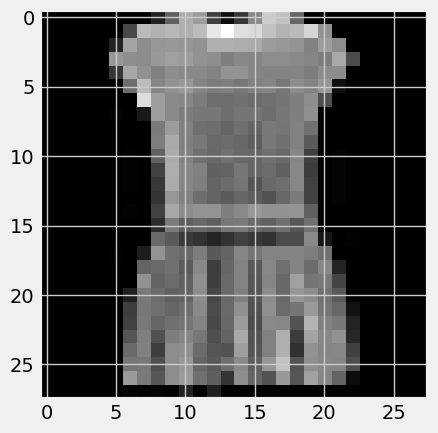

In [24]:
fig = plt.figure
plt.imshow(X_train_full[3], cmap='gray')
plt.show()

In [27]:
tf.random.set_seed(42)
np.random.seed(42)

LAYERS = [ tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")]


model = tf.keras.models.Sequential(LAYERS)

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [31]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/10
1719/1719 - 8s - loss: 1.2743 - accuracy: 0.6028 - val_loss: 0.8792 - val_accuracy: 0.7082 - 8s/epoch - 5ms/step
Epoch 2/10
1719/1719 - 7s - loss: 0.7977 - accuracy: 0.7311 - val_loss: 0.7170 - val_accuracy: 0.7644 - 7s/epoch - 4ms/step
Epoch 3/10
1719/1719 - 7s - loss: 0.6890 - accuracy: 0.7699 - val_loss: 0.6522 - val_accuracy: 0.7882 - 7s/epoch - 4ms/step
Epoch 4/10
1719/1719 - 7s - loss: 0.6304 - accuracy: 0.7910 - val_loss: 0.5979 - val_accuracy: 0.8078 - 7s/epoch - 4ms/step
Epoch 5/10
1719/1719 - 8s - loss: 0.5917 - accuracy: 0.8038 - val_loss: 0.5656 - val_accuracy: 0.8184 - 8s/epoch - 4ms/step
Epoch 6/10
1719/1719 - 8s - loss: 0.5637 - accuracy: 0.8109 - val_loss: 0.5418 - val_accuracy: 0.8222 - 8s/epoch - 5ms/step
Epoch 7/10
1719/1719 - 8s - loss: 0.5423 - accuracy: 0.8174 - val_loss: 0.5223 - val_accuracy: 0.8284 - 8s/epoch - 5ms/step
Epoch 8/10
1719/1719 - 9s - loss: 0.5257 - accuracy: 0.8219 - val_loss: 0.5149 - val_accuracy: 0.8286 - 9s/epoch - 5ms/step
Epoch 9/

# Batch Normalization

#### Internal Covariate Shift
* We define Internal Covariate Shift as the change in the
distribution of network activations due to the change in
network parameters during training. 

* To improve the training, we seek to reduce the internal covariate shift. By
fixing the distribution of the layer inputs x as the training
progresses, we expect to improve the training speed. 

* It has been long known (LeCun et al., 1998b; Wiesler & Ney,
2011) that the network training converges faster if its inputs are whitened – i.e., linearly transformed to have zero
means and unit variances, and decorrelated. 

* As each layer observes the inputs produced by the layers below, it would
be advantageous to achieve the same whitening of the inputs of each layer. 

* By whitening the inputs to each layer, we would take a step towards achieving the fixed distributions of inputs that would remove the ill effects of the
internal covariate shift.

reference [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf)

## Input: 
### Values of x over a mini-batch: $B = \{x_{1...m}\}$
### Learnable parameters: $\gamma$ and $\beta$


## Output: 
### $\{z^{(i)} = BN _{\gamma, \beta}(x^{(i)})\}$

## Algorithm:

### 1. mini-batch mean: $\mu_B = \frac{1}{m_B} \sum_{i=1}^{m_B} x^{(i)}$

### 2. mini-batch variance: $\sigma_B^2 = \frac{1}{m_B} \sum_{i=1}^{m_B} (x^{(i)} - \mu_B)^2$

### 3. normalize: $\hat{x}^{(i)} = \frac{x^{(i)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$

### 4. scale and shift: $ z^{(i)} = \gamma \otimes  \hat{x}^{(i)} + \beta \equiv BN _{\gamma, \beta}(x^{(i)})\ $ 

---

## BN Approach One

In [32]:
del model

In [33]:
LAYERS_BN = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS_BN)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [21]:
784 * 4 , 300 * 4 , 100 * 4

784 * 4 + 300 * 4 + 100 * 4

(784 * 4 + 300 * 4 + 100 * 4)/2

2368.0

In [22]:
784 * 4 # mean, variance, gamma and Beta

3136

In [23]:
300 * 4

1200

In [24]:
100 *4 

400

In [25]:
3136 + 1200 + 400

4736

In [26]:
4736 / 2

2368.0

In [27]:
266610 + 2368.0

268978.0

In [28]:
266610 + 4736

271346

In [35]:
bn1 = model.layers[1]
for variable in bn1.variables:
    print(f"variable name: {variable.name.split('/')[-1][:-2]}, \nis trainable: {variable.trainable}\n\n")

variable name: gamma, 
is trainable: True


variable name: beta, 
is trainable: True


variable name: moving_mean, 
is trainable: False


variable name: moving_variance, 
is trainable: False




In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.8343 - accuracy: 0.7216 - val_loss: 0.5589 - val_accuracy: 0.8148
Epoch 2/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5690 - accuracy: 0.8035 - val_loss: 0.4831 - val_accuracy: 0.8368
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5146 - accuracy: 0.8216 - val_loss: 0.4503 - val_accuracy: 0.8454
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4754 - accuracy: 0.8349 - val_loss: 0.4271 - val_accuracy: 0.8526
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4515 - accuracy: 0.8428 - val_loss: 0.4117 - val_accuracy: 0.8590
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4374 - accuracy: 0.8461 - val_loss: 0.4006 - val_accuracy: 0.8630
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4216 - accuracy: 0.8522 - val_loss: 0.3886 - val_ac

## BN Approach Two

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [14]:
del model

In [15]:
LAYERS_BN_BIAS_FALSE = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS_BN_BIAS_FALSE)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0346 - accuracy: 0.6739 - val_loss: 0.6680 - val_accuracy: 0.7886
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6757 - accuracy: 0.7819 - val_loss: 0.5537 - val_accuracy: 0.8212
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5961 - accuracy: 0.8021 - val_loss: 0.4996 - val_accuracy: 0.8352
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5456 - accuracy: 0.8176 - val_loss: 0.4655 - val_accuracy: 0.8460
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5140 - accuracy: 0.8249 - val_loss: 0.4419 - val_accuracy: 0.8508
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4915 - accuracy: 0.8309 - val_loss: 0.4238 - val_accuracy: 0.8536
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4741 - accuracy: 0.8376 - val_loss: 0.4103 - val_accuracy: